# Regression Linéaire Simple du dataset Iris - Gradient Descent

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Dataset
Chargement du dataset Iris pour effectuer les prédictions de la largeur des pétales en fonction de longueur des pétales

In [29]:
dataset=pd.read_csv("iris.csv")

In [30]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


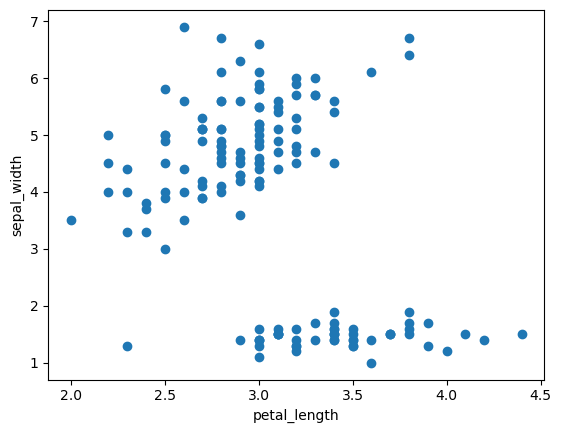

In [31]:
plt.plot(dataset["sepal_width"],dataset["petal_length"],'o')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.show()

In [32]:
df=dataset[['petal_length','sepal_width']]
df

,petal_length,sepal_width
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2
3,1.5,3.1
4,1.4,3.6
...,...,...
145,5.2,3.0
146,5.0,2.5
147,5.2,3.0
148,5.4,3.4


In [33]:

x=dataset.petal_length
y=dataset.sepal_width


In [34]:
x

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [35]:
x.shape

(150,)

In [36]:
y

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [37]:
y.shape

(150,)

Important: Après avoir vérifié les dimensions de x et y, On remarque que y n'a pas les dimensions (150, 1) et x n'a pas les dimensions (150,2). On corrige le problème avec np.reshape et values.

In [38]:
X=dataset.petal_length.values
Y=dataset.sepal_width.values
X

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [39]:
X.shape

(150,)

In [40]:
x=dataset.petal_length.values.reshape(150,1)
y=dataset.sepal_width.values.reshape(150,1)

In [41]:
print(x.shape)
print(y.shape)
print(y)

(150, 1)
(150, 1)
[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [

Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [42]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))



In [43]:
X.shape
print(X[:10])

[[1.96 1.4  1.  ]
 [1.96 1.4  1.  ]
 [1.69 1.3  1.  ]
 [2.25 1.5  1.  ]
 [1.96 1.4  1.  ]
 [2.89 1.7  1.  ]
 [1.96 1.4  1.  ]
 [2.25 1.5  1.  ]
 [1.96 1.4  1.  ]
 [2.25 1.5  1.  ]]


Finalement, création d'un vecteur parametre θ, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur 
θ, on utilise comme avant np.random.seed(0)

In [44]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(3,1)
print('Theta:',theta)

Theta: [[1.76405235]
 [0.40015721]
 [0.97873798]]


In [45]:
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (120, 3)
x_test shape  :  (30, 3)
y_train shape  :  (120, 1)
y_test shape  :  (30, 1)


In [46]:
def z_score_normalization(data):
    """
    Normalise les caractéristiques d'un ensemble de données en utilisant la méthode Z-score.

    Args:
    - data : un tableau NumPy contenant les données à normaliser. Chaque colonne représente une caractéristique.

    Returns:
    - data_normalized : le tableau NumPy contenant les données normalisées.
    - mean : le tableau NumPy contenant les moyennes de chaque caractéristique avant normalisation.
    - std : le tableau NumPy contenant les déviations standard de chaque caractéristique avant normalisation.
    """
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [47]:
x_train_norm, mean,std=z_score_normalization(x_train)
x_train_norm

C:\Users\khawl\AppData\Local\Temp\ipykernel_18084\511913207.py:18: RuntimeWarning: invalid value encountered in divide
  data_normalized = (data - mean) / std


array([[-1.28897203, -1.5639872 ,         nan],
       [-1.18786403, -1.27728011,         nan],
       [ 0.19610235,  0.38562104,         nan],
       [-1.16278924, -1.21993869,         nan],
       [-1.23316041, -1.39196294,         nan],
       [ 0.65230166,  0.72966956,         nan],
       [ 0.26809125,  0.44296246,         nan],
       [-1.18786403, -1.27728011,         nan],
       [-1.21132108, -1.33462153,         nan],
       [-1.18786403, -1.27728011,         nan],
       [ 0.73399693,  0.78701097,         nan],
       [ 0.26809125,  0.44296246,         nan],
       [ 0.41692223,  0.5576453 ,         nan],
       [-1.23316041, -1.39196294,         nan],
       [-1.18786403, -1.27728011,         nan],
       [-0.26252356, -0.01576889,         nan],
       [ 0.73399693,  0.78701097,         nan],
       [ 1.07695529,  1.01637665,         nan],
       [ 0.19610235,  0.38562104,         nan],
       [ 1.63992466,  1.36042516,         nan],
       [ 0.05697773,  0.2709382 ,       

In [48]:
x_test_norm= (x_test - mean)/std
x_test_norm

C:\Users\khawl\AppData\Local\Temp\ipykernel_18084\329464685.py:1: RuntimeWarning: invalid value encountered in divide
  x_test_norm= (x_test - mean)/std


array([[ 0.41692223,  0.5576453 ,         nan],
       [-1.13609673, -1.16259727,         nan],
       [ 2.48114326,  1.81915651,         nan],
       [ 0.26809125,  0.44296246,         nan],
       [ 0.49376431,  0.61498672,         nan],
       [-1.18786403, -1.27728011,         nan],
       [-0.32157064, -0.07311031,         nan],
       [ 0.73399693,  0.78701097,         nan],
       [ 0.26809125,  0.44296246,         nan],
       [-0.13957623,  0.09891395,         nan],
       [ 0.73399693,  0.78701097,         nan],
       [-1.21132108, -1.33462153,         nan],
       [-1.23316041, -1.39196294,         nan],
       [-1.18786403, -1.27728011,         nan],
       [-1.18786403, -1.27728011,         nan],
       [ 0.41692223,  0.5576453 ,         nan],
       [ 1.3511602 ,  1.18840091,         nan],
       [-0.13957623,  0.09891395,         nan],
       [ 0.26809125,  0.44296246,         nan],
       [ 1.16673919,  1.07371807,         nan],
       [-1.16278924, -1.21993869,       

In [66]:
#x train:
X_train_norm_1 = np.hstack((x_train_norm, np.ones((x_train.shape[0], 2))))
X_train_norm_1

array([[-1.28897203, -1.5639872 ,         nan,  1.        ,  1.        ],
       [-1.18786403, -1.27728011,         nan,  1.        ,  1.        ],
       [ 0.19610235,  0.38562104,         nan,  1.        ,  1.        ],
       [-1.16278924, -1.21993869,         nan,  1.        ,  1.        ],
       [-1.23316041, -1.39196294,         nan,  1.        ,  1.        ],
       [ 0.65230166,  0.72966956,         nan,  1.        ,  1.        ],
       [ 0.26809125,  0.44296246,         nan,  1.        ,  1.        ],
       [-1.18786403, -1.27728011,         nan,  1.        ,  1.        ],
       [-1.21132108, -1.33462153,         nan,  1.        ,  1.        ],
       [-1.18786403, -1.27728011,         nan,  1.        ,  1.        ],
       [ 0.73399693,  0.78701097,         nan,  1.        ,  1.        ],
       [ 0.26809125,  0.44296246,         nan,  1.        ,  1.        ],
       [ 0.41692223,  0.5576453 ,         nan,  1.        ,  1.        ],
       [-1.23316041, -1.39196294,     

In [67]:
X_test_norm_1 = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
X_test_norm_1

array([[ 0.41692223,  0.5576453 ,         nan,  1.        ],
       [-1.13609673, -1.16259727,         nan,  1.        ],
       [ 2.48114326,  1.81915651,         nan,  1.        ],
       [ 0.26809125,  0.44296246,         nan,  1.        ],
       [ 0.49376431,  0.61498672,         nan,  1.        ],
       [-1.18786403, -1.27728011,         nan,  1.        ],
       [-0.32157064, -0.07311031,         nan,  1.        ],
       [ 0.73399693,  0.78701097,         nan,  1.        ],
       [ 0.26809125,  0.44296246,         nan,  1.        ],
       [-0.13957623,  0.09891395,         nan,  1.        ],
       [ 0.73399693,  0.78701097,         nan,  1.        ],
       [-1.21132108, -1.33462153,         nan,  1.        ],
       [-1.23316041, -1.39196294,         nan,  1.        ],
       [-1.18786403, -1.27728011,         nan,  1.        ],
       [-1.18786403, -1.27728011,         nan,  1.        ],
       [ 0.41692223,  0.5576453 ,         nan,  1.        ],
       [ 1.3511602 ,  1.

In [68]:
def model(X, theta):
    return X.dot(theta)

In [69]:
print(model(X, theta))

[[ 4.99650067]
 [ 4.99650067]
 [ 4.48019082]
 [ 5.54809158]
 [ 4.99650067]
 [ 6.75711652]
 [ 4.99650067]
 [ 5.54809158]
 [ 4.99650067]
 [ 5.54809158]
 [ 5.54809158]
 [ 6.13496352]
 [ 4.99650067]
 [ 3.55341425]
 [ 3.99916201]
 [ 5.54809158]
 [ 4.48019082]
 [ 4.99650067]
 [ 6.75711652]
 [ 5.54809158]
 [ 6.75711652]
 [ 5.54809158]
 [ 3.14294754]
 [ 6.75711652]
 [ 8.10726565]
 [ 6.13496352]
 [ 6.13496352]
 [ 5.54809158]
 [ 4.99650067]
 [ 6.13496352]
 [ 6.13496352]
 [ 5.54809158]
 [ 5.54809158]
 [ 4.99650067]
 [ 5.54809158]
 [ 3.99916201]
 [ 4.48019082]
 [ 5.54809158]
 [ 4.48019082]
 [ 5.54809158]
 [ 4.48019082]
 [ 4.48019082]
 [ 4.48019082]
 [ 6.13496352]
 [ 8.10726565]
 [ 4.99650067]
 [ 6.13496352]
 [ 4.99650067]
 [ 5.54809158]
 [ 4.99650067]
 [41.82739319]
 [38.50150543]
 [45.29440513]
 [30.80420435]
 [40.14680878]
 [38.50150543]
 [41.82739319]
 [21.50978682]
 [40.14680878]
 [29.37058728]
 [23.98892945]
 [33.77728164]
 [30.80420435]
 [41.82739319]
 [25.28142234]
 [36.89148312]
 [38.50150

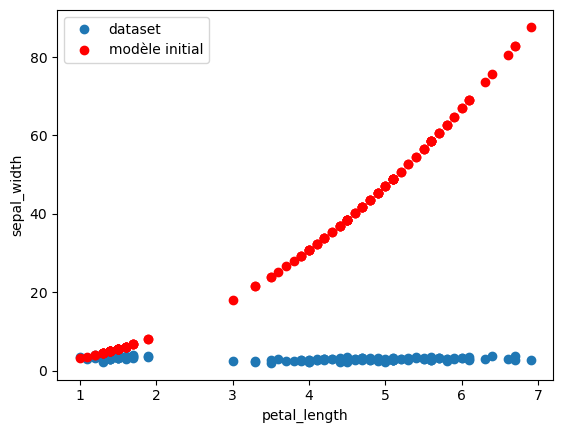

In [70]:

plt.plot(x,y,'o',label='dataset')
#plt.plot(dataset["sepal_width"],dataset["petal_length"],'o',label='dataset')
plt.plot(x, model(X, theta),'o',c='r',label='modèle initial')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
#plt.xlim(0, 5)
#plt.ylim(0, 7)
plt.legend()
plt.show()

## 3. Fonction coût : Erreur Quadratique Moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne, Mean Squared Error (MSE) en anglais.
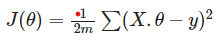

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [71]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [72]:
cost_function(X, y, theta)

709.569060166302

## 4. Gradients et Descente de Gradient
On implémente la formule du gradient pour la MSE
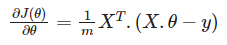
Ensuite on utilise cette fonction dans la descente de gradient:



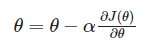

In [73]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [74]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [75]:
n_iterations = 40000
learning_rate = 0.004

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [76]:
cost_history # l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif

array([5.59635739e+02, 4.41423748e+02, 3.48221561e+02, ...,
       5.83470591e-02, 5.83470574e-02, 5.83470557e-02])

In [77]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[ 0.08394072],
       [-0.69346787],
       [ 4.2145133 ]])

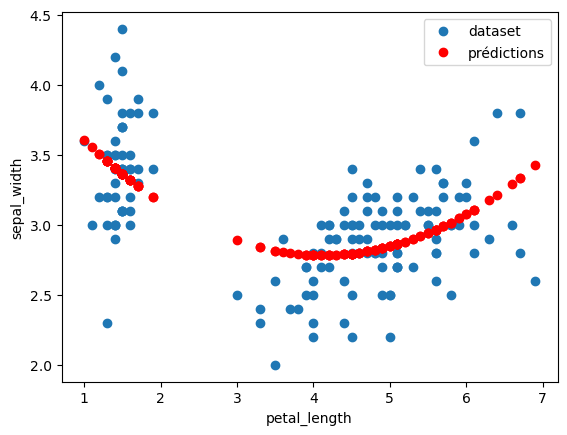

In [78]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affichage des résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.plot(x,y,'o',label='dataset')
plt.plot(x,predictions ,'o',c='r',label='prédictions')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

In [60]:
predictions

array([[3.4081821 ],
       [3.4081821 ],
       [3.45486489],
       [3.36317812],
       [3.4081821 ],
       [3.27820661],
       [3.4081821 ],
       [3.36317812],
       [3.4081821 ],
       [3.36317812],
       [3.36317812],
       [3.31985296],
       [3.4081821 ],
       [3.55326692],
       [3.5032265 ],
       [3.36317812],
       [3.45486489],
       [3.4081821 ],
       [3.27820661],
       [3.36317812],
       [3.27820661],
       [3.36317812],
       [3.60498616],
       [3.27820661],
       [3.19995036],
       [3.31985296],
       [3.31985296],
       [3.36317812],
       [3.4081821 ],
       [3.31985296],
       [3.31985296],
       [3.36317812],
       [3.36317812],
       [3.4081821 ],
       [3.36317812],
       [3.5032265 ],
       [3.45486489],
       [3.36317812],
       [3.45486489],
       [3.36317812],
       [3.45486489],
       [3.45486489],
       [3.45486489],
       [3.31985296],
       [3.19995036],
       [3.4081821 ],
       [3.31985296],
       [3.408

In [61]:
# Test: # prédire la largeur d'un pétale qui a une longueur de 2,5 cm
X_2_5= np.array([9,3,1])
pred_y_2_5=model(X_2_5, theta_final) 
print(pred_y_2_5)

[2.88957618]


## 6. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

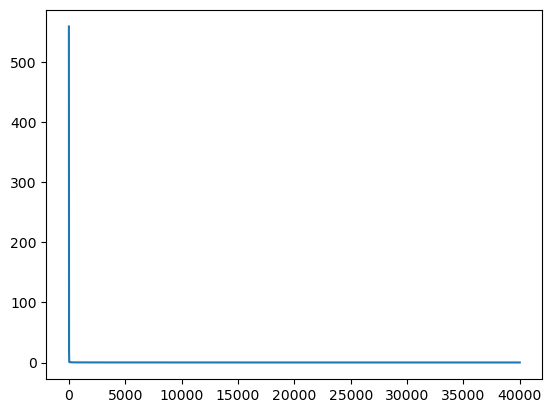

In [62]:
plt.plot(range(n_iterations), cost_history)
plt.show()

## 7. Evaluation du modèle - Coefficient de détermination

   Le coefficient de détermination est un indice de la qualité de la prédiction de la régression linéaire. Le coefficient de détermination se situe entre 0 et 1. Plus il est proche de 1, plus la régression linéaire est en adéquation avec les données collectées
  

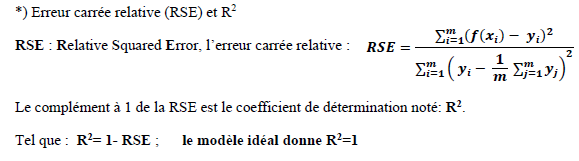

In [63]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [64]:
coef_determination(y, predictions)

0.3751341642801218

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
